In [65]:
import sys
sys.path.insert(0, '../')
import matplotlib.pyplot as plt
import numpy as np
import os
import torch
from generators import DataGenerator
from global_config import global_config
from utils.units import dbz_mm
from visualizers import rainfall_shade

In [17]:
config = {
        'DEVICE': torch.device('cuda:0'),
        'IN_LEN': 5,
        'OUT_LEN': 18,
        'BATCH_SIZE': 2,
    }

In [20]:
data_gen = DataGenerator(global_config['DATA_PATH'], 1, 
        2, config['IN_LEN'], config['OUT_LEN'], config['IN_LEN'] + config['OUT_LEN'], config=config)

In [83]:
train_data, train_label = data_gen.get_train(7324)

In [84]:
data = train_data.detach().cpu().numpy()
label = train_label.detach().cpu().numpy()

In [85]:
data.shape, label.shape

((5, 2, 1, 480, 480), (18, 2, 1, 480, 480))

In [86]:
np.max(dbz_mm(data[1,0,0]))

134.99994

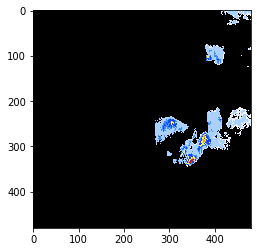

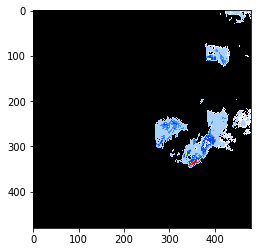

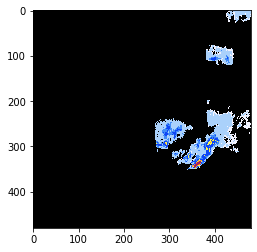

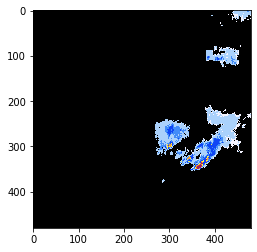

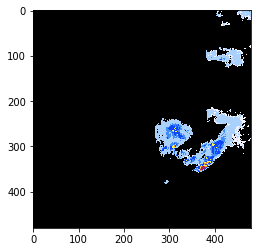

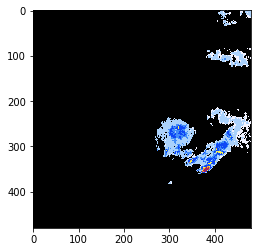

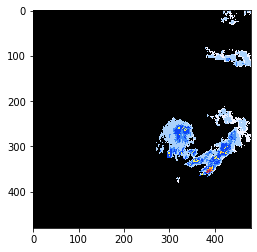

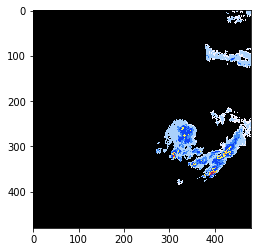

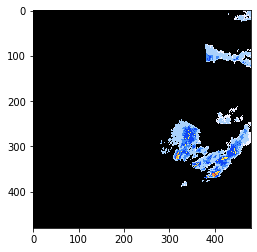

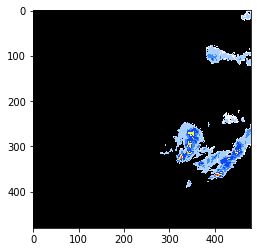

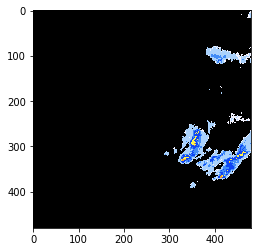

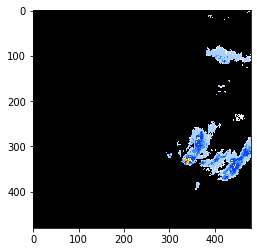

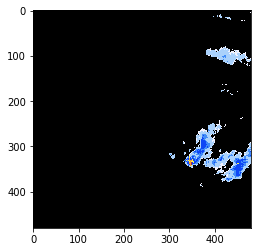

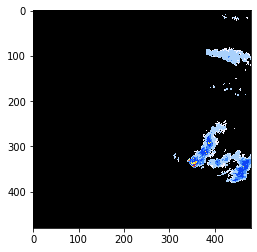

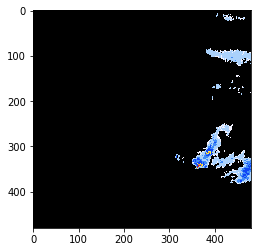

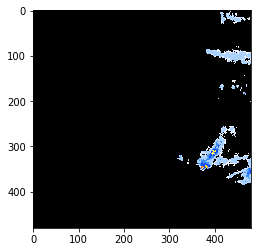

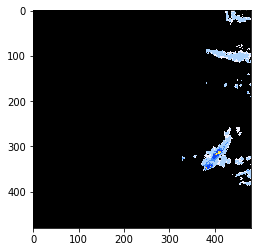

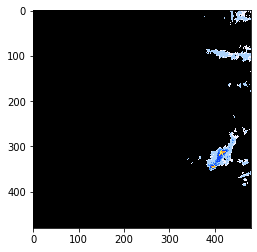

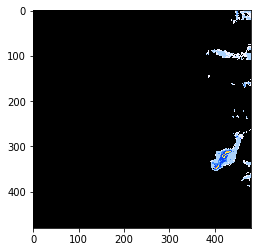

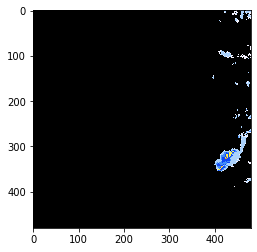

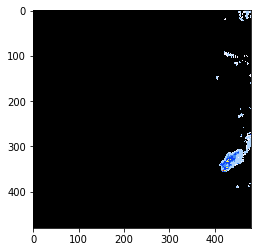

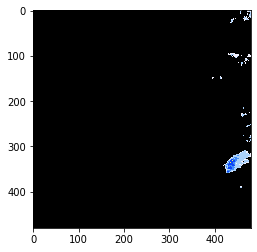

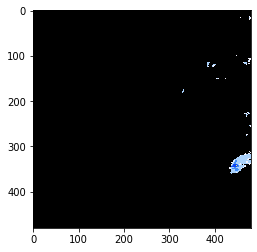

In [87]:
for i in range(5):
    plt.imshow(rainfall_shade(dbz_mm(data[i,0,0])), cmap='gray')
    plt.show()
for i in range(18):
    plt.imshow(rainfall_shade(dbz_mm(label[i,0,0])), cmap='gray')
    plt.show()